# Ford GoBike System Exploration
##  - Suraj Singh Shahi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='#gathering'>Data Gathering</a></li> 
<li><a href="#assessing">Preliminary Wrangling</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#ue">Univariate Exploration</a></li>
<li><a href="#be">Bivariate Exploration</a></li>
<li><a href="#me">Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>
## Introduction:

> The main focus of this project is to do **exploratory** data analysis on *GoBike System* **dataset** leading to an **explanatory** analysis. 

<a id='gathering'></a>
# Data Gathering

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# To filter the warning notification
import warnings
warnings.filterwarnings('ignore')
df.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
12064,399,2019-02-27 17:58:48.9890,2019-02-27 18:05:28.6440,66.0,3rd St at Townsend St,37.778742,-122.392741,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,3147,Subscriber,1976.0,Male,No
77757,450,2019-02-19 02:10:16.6190,2019-02-19 02:17:47.2950,357.0,2nd St at Julian St,37.341132,-121.892844,317.0,San Salvador St at 9th St,37.333955,-121.877349,1255,Subscriber,1994.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


<a id='assessing'></a>
# Preliminary Wrangling

This document explores a dataset containing 183,411 bike rides. This dataset includes the bike rides of February, 2019.

## Quality 
**Errorenous Datatype**.

### Define
- Convert the above mentioned columns in the correct datatype

- *start_time*                - Datetime
- *end_time*                  - Datetime
- *bike_share_for_all_trip*   - Category
- *start_station_id*          - String
- *end_station_id*            - String
- *bike_id*                   - String
- *user_type*                 - Category
- *member_birth_year*         - Integer
- *member_gender*             - Category

### Code

In [5]:
# changing the datatype of the above given columns
df['start_time'] = df['start_time'].astype('datetime64')
df['end_time'] = df['end_time'].astype('datetime64')
for x in ['user_type', 'bike_share_for_all_trip', 'member_gender']:
    df[x] = df[x].astype('category')
for x in ['start_station_id', 'end_station_id', 'bike_id']:
    df[x] = df[x].astype('object')
    


In [6]:
df['member_birth_year'] = df['member_birth_year'].fillna(0)
df['member_birth_year'] = df['member_birth_year'].astype('int64')

### Test

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          183412 non-null int64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), obj

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1895.366132
std,1794.389780,0.099581,0.117097,0.099490,0.116673,411.850439
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,0.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1979.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [10]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
df.query("end_station_name != end_station_name").isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           197
start_station_name         197
start_station_latitude       0
start_station_longitude      0
end_station_id             197
end_station_name           197
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                2
bike_share_for_all_trip      0
dtype: int64

In [12]:
# There are 197 entries in which start and end station is missing
df.query('start_station_name != start_station_name')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984,Male,Yes
6214,1334,2019-02-28 10:32:47.930,2019-02-28 10:55:02.028,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990,Male,No
8499,240,2019-02-28 08:23:07.092,2019-02-28 08:27:07.289,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988,Male,No
8783,883,2019-02-28 07:58:07.372,2019-02-28 08:12:51.276,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980,Male,No
10967,116,2019-02-27 19:25:57.036,2019-02-27 19:27:54.026,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988,Male,No
11071,828,2019-02-27 19:03:14.638,2019-02-27 19:17:03.434,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980,Male,No


## Quality 
**Removing rows with Null values.**.

### Define
- 197 rows has null values at start, end station id and name. We are removing it.

### Code

In [13]:
df = df.query('start_station_id == start_station_id')

### Test

In [14]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

**Adding new columns, derived from already present columns**.<br>
We need to add some columns in order for better study of this system. We need to have a column for *age* instead of birth year, and also Divide the time in Morning, Afternoon, Evening and  Night. i.e. 
<pre>
member_birth_year        -   age 
start_time               -   morning, afternoon, evening and night (categories).
</pre>

In [15]:
import datetime

**Adding a column of duration_min using *duration_sec***

In [16]:
df['duration_min'] = df['duration_sec']/60
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
120090,1343,2019-02-11 17:04:55.564,2019-02-11 17:27:18.807,66,3rd St at Townsend St,37.778742,-122.392741,92,Mission Bay Kids Park,37.772301,-122.393028,5175,Subscriber,1985,Male,No,22.383333
57596,504,2019-02-21 08:08:11.197,2019-02-21 08:16:35.395,58,Market St at 10th St,37.776619,-122.417385,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5719,Subscriber,1994,Male,No,8.400000
135731,186,2019-02-08 12:01:45.679,2019-02-08 12:04:51.919,24,Spear St at Folsom St,37.789677,-122.390428,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4809,Subscriber,1982,Male,No,3.100000


**Adding a column of distance_km by using longitude and latitude values of starting and ending stations**.

In [17]:
def distance_cal(long1, lat1, long2, lat2):
    
    long1, lat1, long2, lat2 = map(np.radians, [long1, lat1, long2, lat2])
    
    newlong = long2 - long1
    newlat  = lat2 - lat1
    
    dist_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlong/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(dist_formula ))
    km = 6367 * dist
    return km

df['distance_km'] = distance_cal(df['start_station_longitude'], df['start_station_latitude'], df['end_station_longitude'], df['end_station_latitude'])


In [18]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance_km
31564,653,2019-02-24 16:25:12.618,2019-02-24 16:36:06.531,36,Folsom St at 3rd St,37.78383,-122.39887,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,3090,Subscriber,1990,Female,No,10.883333,1.189107


**Adding a column of speed_kmph of the bike using *distance_km* and *duration_min*.**

In [19]:
df['speed_kmph'] = 60* df['distance_km']/(df['duration_min'])

In [20]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance_km,speed_kmph
67532,378,2019-02-20 07:50:16.125,2019-02-20 07:56:34.872,129,Harrison St at 20th St,37.758862,-122.412544,114,Rhode Island St at 17th St,37.764478,-122.40257,6144,Subscriber,1986,Male,No,6.3,1.075771,10.245436


**Adding three columns, (start_day, end_day and dom(day of month)) using *start_time* and *end_time***.

In [21]:
# Separating out the day from start_time using calendar library
import calendar
df['start_day'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

df['end_day']   = df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

df['dom'] = df['start_time'].dt.day

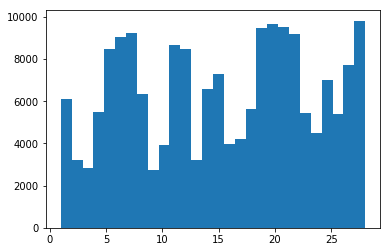

In [22]:
plt.hist(data = df, x = 'dom', bins = 28);

### Dividing the day into four periods:

- **Morning**     - (6 am to 12pm)
- **Afternoon**   - (12 pm to 4pm)
- **Evening**     - (4 pm to 8 pm)
- **Night**       - Rest of the time


In [23]:
# Diving the day into four parts, according to the above rule.
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period'] = 'Night'
df['period'][(df['start_hour'] >= 6) & (df['start_hour'] <= 12)] = 'Morning'
df['period'][(df['start_hour'] >= 12) & (df['start_hour'] < 16)] = 'Afternoon'
df['period'][(df['start_hour'] >= 16) & (df['start_hour'] < 20)] = 'Evening'

In [24]:
df[['start_time','period','start_hour']].sample(3)

,start_time,period,start_hour
139417,2019-02-07 21:19:11.004,Night,21
150946,2019-02-06 17:49:04.171,Evening,17
60674,2019-02-20 18:15:22.639,Evening,18


**Creating age column using *member_birth_year***.

In [25]:
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

In [26]:
# 5 point summary of the column.
df['age'].describe()

count    183215.000000
mean        123.711525
std         412.013105
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max        2019.000000
Name: age, dtype: float64

### Datatype conversion :
**Converting the newly formed columns (*start_day, end_day* and *period*) into category type from Sting type**.

In [27]:
# Converting all three in category type
for x in ['start_day', 'end_day', 'period']:
    df[x] = df[x].astype('category')

## Droping non useful columns:
Need to drop some of the columns we don't need now. As we have extracted the useful information from it including :


In [28]:
df = df.drop(['end_time','start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'member_birth_year' ], axis = 1)

In [29]:
df.sample()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,distance_km,speed_kmph,start_day,end_day,dom,start_hour,period,age
175254,539,2019-02-02 14:56:41.066,Telegraph Ave at Carleton St,Fulton St at Bancroft Way,4790,Customer,Female,No,8.983333,0.869978,5.810612,Sat,Sat,2,14,Afternoon,21


In [30]:
df.columns

Index(['duration_sec', 'start_time', 'start_station_name', 'end_station_name',
       'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'distance_km', 'speed_kmph', 'start_day', 'end_day',
       'dom', 'start_hour', 'period', 'age'],
      dtype='object')

In [31]:
df.shape

(183215, 17)

<a id='store'></a>
## Storing Data
Storing the Clean Dataframe in a CSV file.

In [32]:
df.to_csv('201902-fordgobike-tripdata_clean.csv', index = False)

### What is the structure of your dataset?

There are 183215 entries of bike rides in the dataset with 17 features - <br>
 - Duration_Sec 
 - Start_Time
 - Start_Station_Name
 - End_Station_Name
 - Bike_Id
 - User_Type
 - Member_Gender  
 - Bike_Share_For_All_Trip
 - Duration_Min
 - Distance_Km
 - Speed_Kmph
 - Start_Day
 - End_Day
 - Dom  (Day of the month)
 - Start_Hour
 - Period  (Morning, Afternoon, Evening, Night)
 - Age <br>
We have got integers, floats, string, datetime datatypes and category type variables.


### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding the factors affecting features like (duration, speed, distance covered, user type, age of the rider) which eventually changes different trends in the bike sharing system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration, week day, period (morning/evening..), day of the month, age and user type will be in focus.

<a id='eda'></a>
# Explorative Data Analysis (EDA)

EDA consist of univariate, bivariate and multivariate exploration and in the respective order. 


<a id='ue'></a>
## Univariate Exploration

Exploring distributions of individual features. Finding any pattern or outliers, also cleaning accordingly, if necessary. Also trying to look any kind of relationships between the variables.

In [33]:
# Loading the cleaned dataset in the dataframe df.
df_clean = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

In [34]:
# to preserve the original dataframe
df = df_clean.copy()

If there are any null value in the dataframe (df).

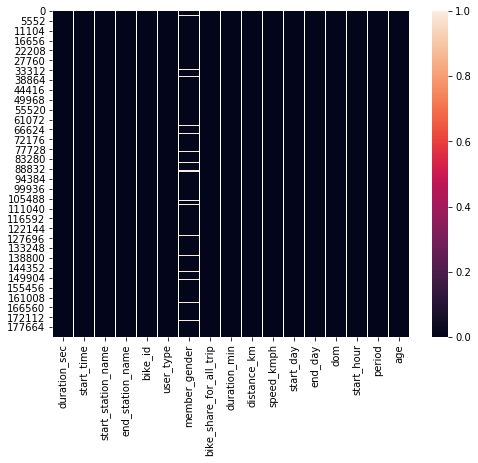

In [35]:
plt.figure(figsize=(8,6))
sb.heatmap(df.isnull())
plt.show();

The null datapoints of member_gender are in the category, 'other'. No need to remove them. 

**Let's see the proportion of different genders in the bike sharing system.**

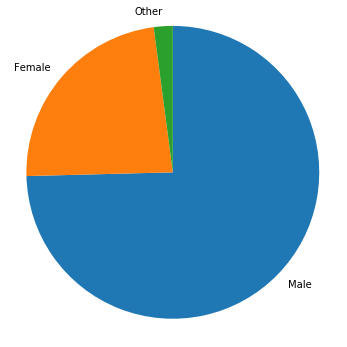

In [36]:
#Pie chart for different gender types:
fig = plt.figure(figsize=(6,6))
sorted_gender = df.member_gender.value_counts()
plt.pie(sorted_gender, labels = sorted_gender.index, startangle = 90, counterclock = False)
plt.axis('square');

**Majority of the Bike Riders are Men, with less than a quarter Women**.
### Types of Users (Subscribers Vs. Customers).

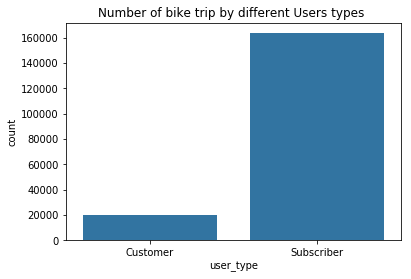

In [37]:
### Types of Users (Subscribers Vs. Customers).
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.title('Number of bike trip by different Users types ');

### We will see the the distribution of duration of our different trips (in seconds).

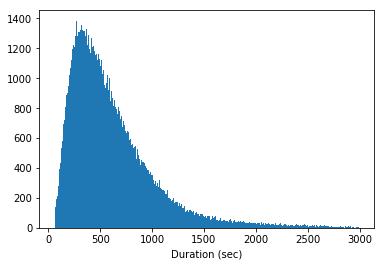

In [38]:
# Time taken for a trip (in seconds)
binsize = 30
bins = np.arange(60, 3000, 5)
plt.hist(data = df, x='duration_sec', bins = bins);
plt.xlabel('Duration (sec)')
plt.show();

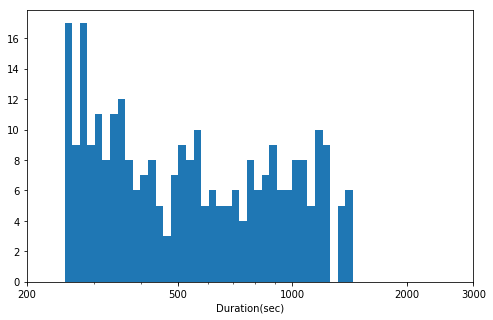

In [39]:
# Using log scale, since it has a very left skewed distribution
log_binsize = 0.02
bins = 10 ** np.arange(2.4, np.log10(df.duration_sec.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlim(0,3000)
plt.xticks([200, 500, 1000, 2000, 3000], [ '200', '500', '1000', '2000', '3000'])
plt.xlabel('Duration(sec)')
plt.show();

Duration (sec) has a very left skewed distribution, a long-tailed distribution. We need to do the log tranformation of it. And we can see most of the rides are short. 
- 3 quarters of the rides are less than 800 sec (13 min).
- 90 percent of the rides are less than 20 min.

In [40]:
df.duration_sec.describe()

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [41]:
np.percentile(df.duration_min, 90)

19.633333333333333

We have already seen a barchart of it, still this is another way to present the data.

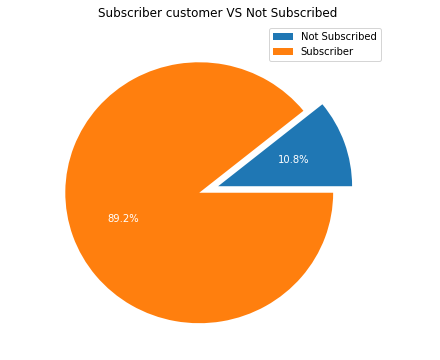

In [42]:
# Pie chart of User type ( subscribed or customer)
total_trips = df['duration_sec'].count()
customer_trips = df[df['user_type']=='Customer']['duration_sec'].count() / total_trips
subscriber_trips = df[df['user_type']=='Subscriber']['duration_sec'].count() / total_trips

plt.figure(figsize=(6,6))
plt.pie([customer_trips,subscriber_trips], explode=(0, 0.15), labels=['Not Subscribed', 'Subscriber'], 
        autopct='%1.1f%%', startangle=0, textprops={'color':'white'})
plt.title("Subscriber customer VS Not Subscribed")
plt.legend();

**89.2 (almost 90) percent of people taking rides are subscribed to the service**.

**Plotting age distribution next.**

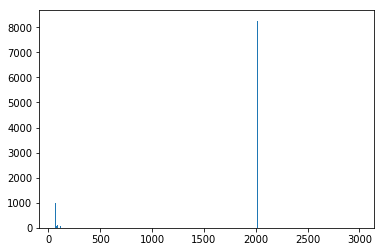

In [43]:
# people of different ages
binsize = 3
bins = np.arange(60, 3000, 5)
plt.hist(data = df, x='age', bins = bins);
#plt.xlim((0, 300));

We know that human age can't be more than 2000, since, we have calculated age by ( 2019 - members birth of year). Some of them has 0 (zero) value at it. That's why.

**Cleaning the graph by that and zooming on the left side of the chart**.

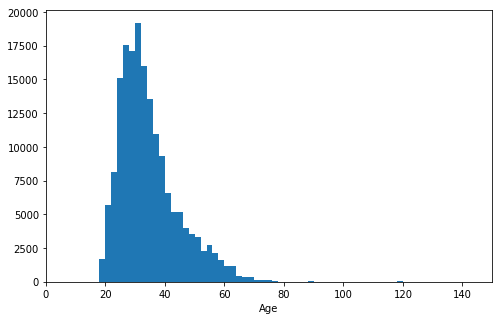

In [44]:
# Focusing only on the part where
plt.figure(figsize = (8,5))
bins = np.arange(0, 120+2, 2)
plt.hist(data = df, x='age', bins = bins)
plt.xlim((0, 150));
plt.xlabel('Age') 
plt.show();

In [45]:
# Looking for people with age 2019.
df.query('age > 120').describe()

,duration_sec,bike_id,duration_min,distance_km,speed_kmph,dom,start_hour,age
count,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000
mean,1189.608422,4275.116045,19.826807,1.718296,9.556004,14.964182,13.501089,2018.772749
std,3758.039560,1777.217556,62.633993,1.111011,4.357901,7.913894,4.542989,20.658578
min,62.000000,11.000000,1.033333,0.000000,0.000000,1.000000,0.000000,141.000000
25%,385.000000,3061.000000,6.416667,0.944359,7.172653,8.000000,9.000000,2019.000000
50%,606.000000,4917.500000,10.100000,1.511280,10.142572,16.000000,14.000000,2019.000000
75%,974.000000,5448.500000,16.233333,2.289302,12.596387,22.000000,17.000000,2019.000000
max,85444.000000,6645.000000,1424.066667,12.317899,22.587988,28.000000,23.000000,2019.000000


**Focusing on age-group (18 - 80)**.

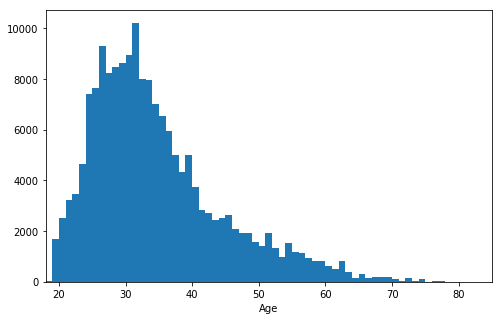

In [46]:
# plotting the histogram for age-group (18-80)
plt.figure(figsize = (8,5))
bins = np.arange(0, 80+1, 1)
plt.hist(data = df, x='age', bins = bins)
plt.xlim((18, 85));
plt.xlabel('Age') 
plt.show();

**Findings**. <br>
Nothing strange is there for people older than 120. Maybe it's a typing error. Can't delete the rows for it. 
- Majority of riders are in the age group (25-45)



### Number of trip at different times of the day. (Relative Frequency)
- **Morning**     - (6 am to 12pm)
- **Afternoon**   - (12 pm to 4pm)
- **Evening**     - (4 pm to 8 pm)
- **Night**       - Rest of the time


In [47]:
# Total number of rows in the dataframe
num_total = df.shape[0]
# Number of rides in each period category
period_counts = df.period.value_counts()
# Order of period from highest to lowest
period_order = period_counts.index
pc = period_counts.values
# maximum no. of period counts
max_period_count = period_counts.max()
# maximum proportion
max_prop = max_period_count / num_total

# tick proportion
tick_props = np.arange(0, max_prop, 0.02)

In [48]:
#tick_names
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# base color
base_color = sb.color_palette()[0]

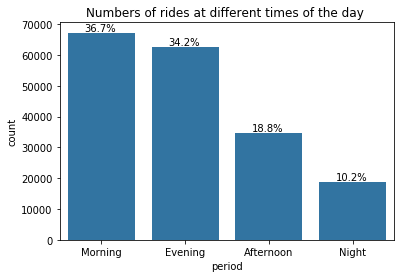

In [49]:
# Putting everything together
sb.countplot(data = df, x = 'period', order = period_order, color = base_color)
for i in range(len(pc)):
    count = pc[i]
    pct_string = '{:0.1f}%'.format(100 * count/num_total)
    plt.text( i-0.2, count , pct_string, va= 'bottom');
plt.title('Numbers of rides at different times of the day ')
plt.show()

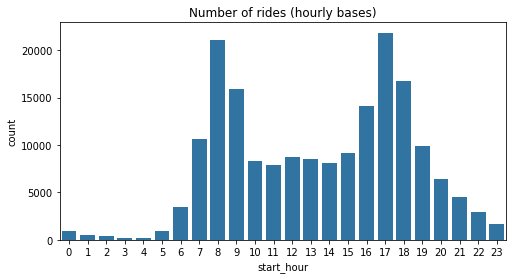

In [50]:
# Seeing the same type of data in an hourly bases
plt.figure(figsize=(8,4))
sb.countplot(data = df, x = 'start_hour', color = base_color)
plt.title('Number of rides (hourly bases)');

**Findings**: Most of the rides happen in the Morning and in the Evening. *Bimodal* Graph is visible. One peak at 7-9 in the morning and the other at 4-6 in the evening. This may be because most of the offices has (9 - 5) working hours. In order to find if the riders are going to work. Let's see in the weekdays and weekend traffic.

### Number of rides taken at different days of the week

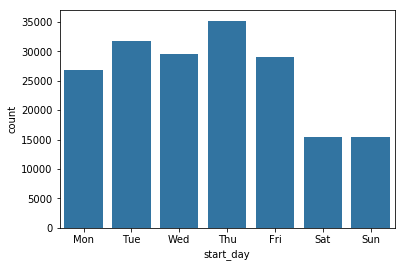

In [51]:
#plotting barchart for number of trip on different days of the week
sb.countplot(data = df, x = 'start_day', order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], color = base_color);

**We can clearly see that on weekend the number of rides are almost half. Lets analyse it in a relative frequency barchart**.

In [52]:
# Total number of rows in the dataframe
num_total = df.shape[0]
# Number of rides in each day
ride_counts = df.start_day.value_counts()
# Order of days from highest to lowest rides
ride_order = ride_counts.index
rc = ride_counts.values
# maximum no. of ride counts
max_ride_count = ride_counts.max()
# maximum proportion
max_prop = max_ride_count / num_total

# tick proportion
tick_props = np.arange(0, max_prop, 0.02)

In [53]:
#tick_names
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# base color
base_color = sb.color_palette()[0]

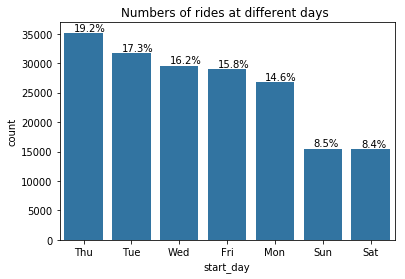

In [54]:
# Putting everything together
sb.countplot(data = df, x = 'start_day', order = ride_order, color = base_color)
for i in range(len(rc)):
    count = rc[i]
    pct_string = '{:0.1f}%'.format(100 * count/num_total)
    plt.text( i-0.2, count , pct_string, va= 'bottom');
plt.title('Numbers of rides at different days ')
plt.show()

#### We are very much certain that the bike riding service is used by people for going to the offices (9-5). But we don't have enough evidence for it. Let's dig some more.

### Most Used Starting and Ending Stations.

**Let's see the 10 most common(used) *starting* and *ending station***.

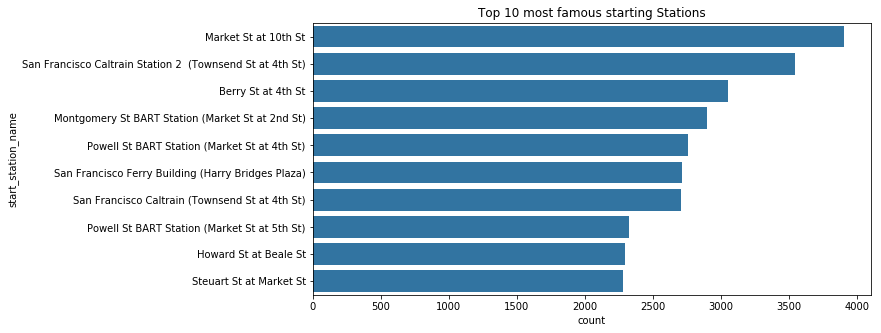

In [55]:
plt.figure(figsize=(10,5))
mc_starting = df.start_station_name.value_counts()[:10]
start_order = mc_starting.index

sb.countplot(data = df, y = 'start_station_name', order = start_order, color = base_color )
plt.title('Top 10 most famous starting Stations');

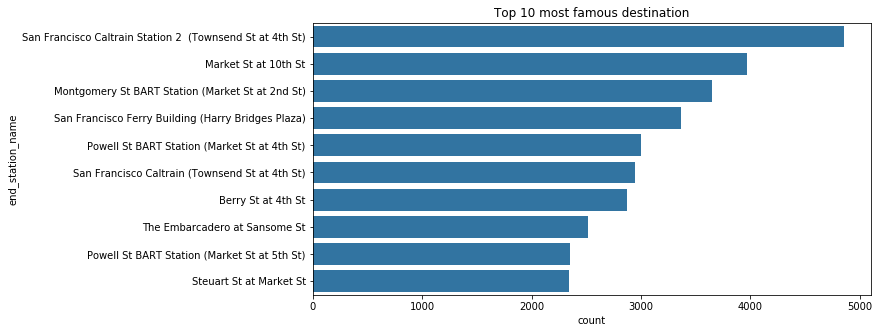

In [56]:
#Plotting the most used end station
plt.figure(figsize=(10,5))
mc_ending = df.end_station_name.value_counts()[:10]
end_order = mc_ending.index

sb.countplot(data = df, y = 'end_station_name', order = end_order, color = base_color )
plt.title('Top 10 most famous destination');

In [57]:
# Let's see how many stations are in both list
start_ls = set(start_order)
intersection = start_ls.intersection(end_order)
intersection_as_list = list(intersection)
for i in range(len(intersection_as_list)):
    print(i+1 , intersection_as_list[i])

1 Powell St BART Station (Market St at 5th St)
2 San Francisco Caltrain (Townsend St at 4th St)
3 Berry St at 4th St
4 Montgomery St BART Station (Market St at 2nd St)
5 Market St at 10th St
6 Steuart St at Market St
7 San Francisco Ferry Building (Harry Bridges Plaza)
8 Powell St BART Station (Market St at 4th St)
9 San Francisco Caltrain Station 2  (Townsend St at 4th St)


**These 9 stations are in both the list**. 
Let's see if this is true for top 50 stations

In [58]:
# Top 50 most used starting station names
starting_50 = df.start_station_name.value_counts()[:50].index
# Top 50 most used ending station names
ending_50   = df.end_station_name. value_counts()[:50].index

# Let's see how many stations are in both list
start_ls = set(starting_50)
intersection = start_ls.intersection(ending_50)
intersection_as_list = list(intersection)
# Number of common stations:
print(len(intersection_as_list))

48


**We saw the top 10 most used starting and ending stations, we also find some very interesting finding here**.
- In the **Top 10** list :
> 9 stations are common.
- In the **Top 50** list : 
> 48 startions are common.

After getting a feeling about all this, now we will see what is the riding pattern throughout the month on different days.
### Lineplot for number of rides on days of the month.
*I am expecting a regular dip as the weekends will be coming on a regualar interval*.

In [59]:
# Number of counts in different days of the month.
day_count = df.dom.value_counts()
days = sorted(day_count.index)
ride_counts = list()
for i in range(len(days)):
    ride_counts.append(day_count[i+1])
ride_counts = np.array(ride_counts)

In [60]:
ride_counts

array([6129, 3229, 2840, 5491, 8484, 9052, 9230, 6352, 2721, 3950, 8664,
       8466, 3200, 6598, 7288, 3992, 4223, 5627, 9453, 9651, 9527, 9193,
       5435, 4490, 7025, 5378, 7706, 9821], dtype=int64)

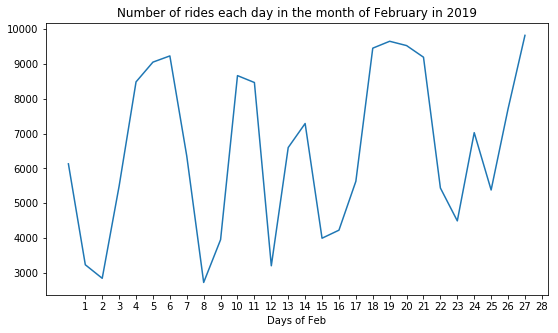

In [61]:
plt.figure(figsize = [9,5])
plt.plot(ride_counts)
plt.title('Number of rides each day in the month of February in 2019')
plt.xlabel('Days of Feb')
plt.xticks(days)
plt.show();

In [62]:
# Unusually low number of rides on 13th of the month. Trying to find any reason.
df.query('dom == 13').describe()

,duration_sec,bike_id,duration_min,distance_km,speed_kmph,dom,start_hour,age
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.0,3200.000000,3200.000000
mean,628.434375,4422.389375,10.473906,1.561189,11.039018,13.0,14.918437,109.635000
std,1825.644143,1666.947964,30.427402,0.959355,3.616263,0.0,4.483226,380.318717
min,68.000000,14.000000,1.133333,0.000000,0.000000,13.0,0.000000,19.000000
25%,300.000000,3728.250000,5.000000,0.881603,9.028161,13.0,12.000000,27.000000
50%,468.000000,4871.000000,7.800000,1.348364,11.111077,13.0,16.000000,32.000000
75%,688.250000,5406.000000,11.470833,2.003651,13.238103,13.0,18.000000,39.000000
max,85444.000000,6644.000000,1424.066667,8.381886,23.454127,13.0,23.000000,2019.000000


**As expected a regular dip in the number of bike rides, during the month of february, due to the weekends**.<br>
**An unusually low number of rides on 13th (Wednesday) of the month, could not finding any reasoning for it.**.<br>
*Maybe people are preparing for valentines day, haha, or it maybe totally random event.*

In [63]:
df.groupby('member_gender').bike_id.count()/df.shape[0]

member_gender
Female    0.222716
Male      0.712278
Other     0.019906
Name: bike_id, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Age has a very particular outlier, 8263 people has age 2019. That's because we calculated age as (2019 - member_birth_year). And many of the members has no data( 0 value) for that. Since there is no other irregularity with those rows, so I kept it.
- Majority of riders are male(71.2%), with less than a quarter female(22.2%) and rest comes in others geder type. 
- 90 % of the trips are less than 20 minutes long. Of which, 3 quarters are shorter than 13 minutes.
- Duration has a very left skewed distribution. It has a long-tailed distribution. Need to perform a log transformation.
- Bimodal distribution is observed when plotting a graph of average trip count during the whole day, with a peak at (7-9) in the morning and second at (4-6) in the evening.
- Bike traffic on weekdays is double compaired to the weekends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- 8263 people has age 2019. That's because we calculated age as (2019 - member_birth_year). And many of the members has no data( 0 value) for that. Since there is no other irregularity with those datapoints, so I kept it.
- Log transformation of the graph, with time taken to complete a trip (duration_sec), as it has a long tailed distribution.
- Formed new columns derived from the existing, the new columns are : duration_min, distance_km, speed_kmph, start_day, end_day, start_hour, period and age, for better regulating and understanding the key aspects for better analysis.
- Dropped columns that are not to be used further. 

<a id='be'></a>
## Bivariate Exploration

To study the relationship between different variables and also to further investigate the insights, patterns, we have gathered in the univariate exploration. Let's go..

Checking if there is any relationship between the age of riders and the speed at which they ride the bike. 

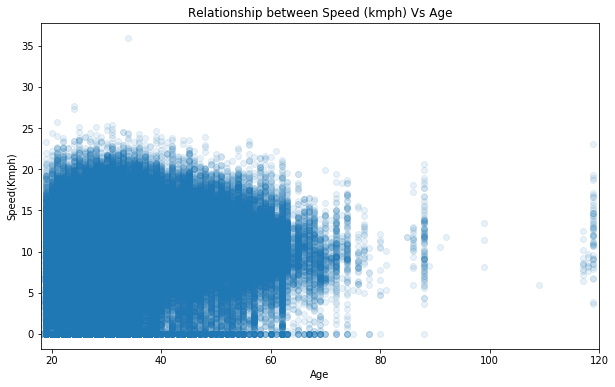

In [64]:
plt.figure(figsize = [10,6])
plt.scatter(data = df , x = 'age' , y = 'speed_kmph' , alpha = 0.1)
plt.title('Relationship between Speed (kmph) Vs Age')
plt.xlabel('Age')
plt.xlim(18,120)
plt.ylabel('Speed(Kmph)');

In [65]:
#Let's see the correlation between age and speed of the bike
np.corrcoef(df.age, df.speed_kmph)[0][1]

-0.06771509848721873

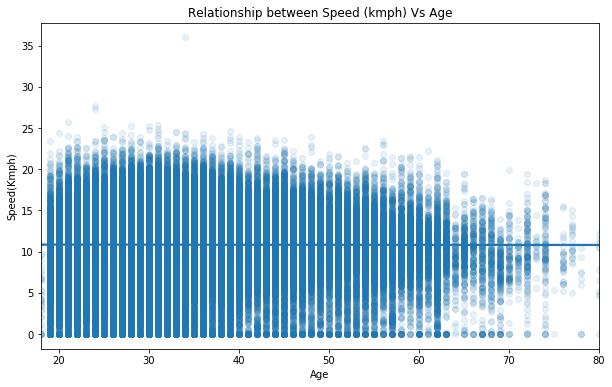

In [66]:
plt.figure(figsize = [10,6])
sb.regplot(data = df , x = 'age' , y = 'speed_kmph' ,scatter_kws = {'alpha': 0.1})
plt.title('Relationship between Speed (kmph) Vs Age')
plt.xlabel('Age')
plt.xlim(18,80)
plt.ylabel('Speed(Kmph)');

**Almost non existant correlation, although with age, a small decline in speed, can be noticed**.

### Average ( Distance (km) , Time (min) and Speed (Kmph) ) for different week days and also comparing the difference between the weekdays and the weekend.

In [67]:
# We have 7 days :
monday = df.query('start_day == "Mon"').duration_min.mean()
tuesday = df.query('start_day == "Tue"').duration_min.mean()
wednesday = df.query('start_day == "Wed"').duration_min.mean()
thursday = df.query('start_day == "Thu"').duration_min.mean()
friday = df.query('start_day == "Fri"').duration_min.mean()
saturday = df.query('start_day == "Sat"').duration_min.mean()
sunday = df.query('start_day == "Sun"').duration_min.mean()
weekdays = df.query('start_day in ["Mon", "Tue","Wed", "Thu", "Fri"]').duration_min.mean()
weekends = df.query('start_day in ["Sat", "Sun"]').duration_min.mean()

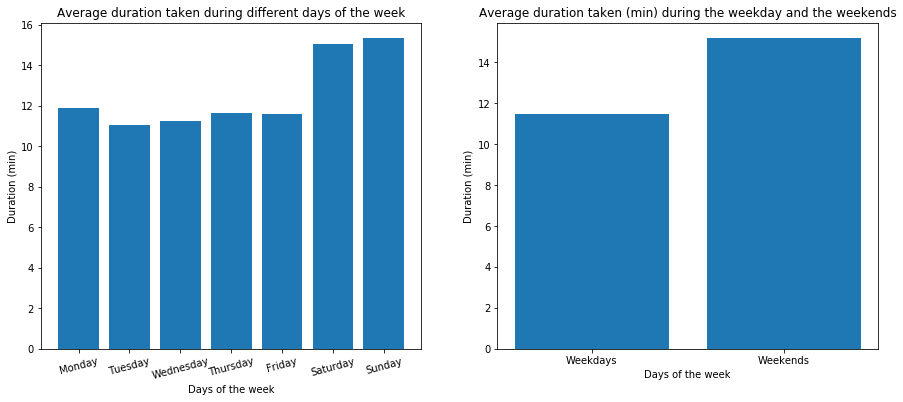

In [68]:
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ],[monday, tuesday, wednesday, thursday, friday, saturday, sunday])
plt.title('Average duration taken during different days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Duration (min)')
plt.xticks(rotation = 15);

plt.subplot(1,2,2)
plt.bar(['Weekdays', 'Weekends' ],[weekdays, weekends])
plt.title('Average duration taken (min) during the weekday and the weekends')
plt.xlabel('Days of the week')
plt.ylabel('Duration (min)');

**Findings** :
*Average Duration (min) of the trip in Weekends is higher than weekdays*. 

In [69]:
# Average Speed during weekdays and weekends
monday = df.query('start_day == "Mon"').speed_kmph.mean()
tuesday = df.query('start_day == "Tue"').speed_kmph.mean()
wednesday = df.query('start_day == "Wed"').speed_kmph.mean()
thursday = df.query('start_day == "Thu"').speed_kmph.mean()
friday = df.query('start_day == "Fri"').speed_kmph.mean()
saturday = df.query('start_day == "Sat"').speed_kmph.mean()
sunday = df.query('start_day == "Sun"').speed_kmph.mean()
weekdays = df.query('start_day in ["Mon", "Tue","Wed", "Thu", "Fri"]').speed_kmph.mean()
weekends = df.query('start_day in ["Sat", "Sun"]').speed_kmph.mean()

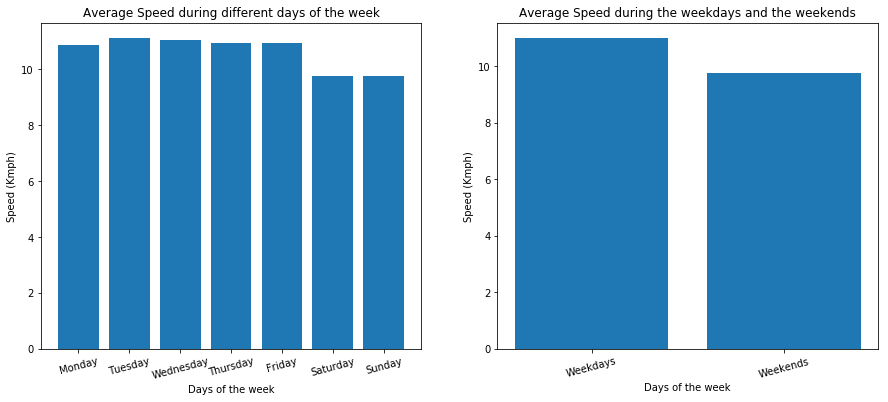

In [70]:
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ],[monday, tuesday, wednesday, thursday, friday, saturday, sunday])
plt.title('Average Speed during different days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Speed (Kmph)')
plt.xticks(rotation = 15);

plt.subplot(1,2,2)
plt.bar(['Weekdays', 'Weekends' ],[weekdays, weekends])
plt.title('Average Speed during the weekdays and the weekends')
plt.xlabel('Days of the week')
plt.ylabel('Speed (Kmph)')
plt.xticks(rotation = 15);

**Findings**:
*Average Speed (Kmph) of the bikes during Weekdays is higher than weekends*. 

In [71]:
monday = df.query('start_day == "Mon"').distance_km.mean()
tuesday = df.query('start_day == "Tue"').distance_km.mean()
wednesday = df.query('start_day == "Wed"').distance_km.mean()
thursday = df.query('start_day == "Thu"').distance_km.mean()
friday = df.query('start_day == "Fri"').distance_km.mean()
saturday = df.query('start_day == "Sat"').distance_km.mean()
sunday = df.query('start_day == "Sun"').distance_km.mean()
weekdays = df.query('start_day in ["Mon", "Tue","Wed", "Thu", "Fri"]').distance_km.mean()
weekends = df.query('start_day in ["Sat", "Sun"]').distance_km.mean()

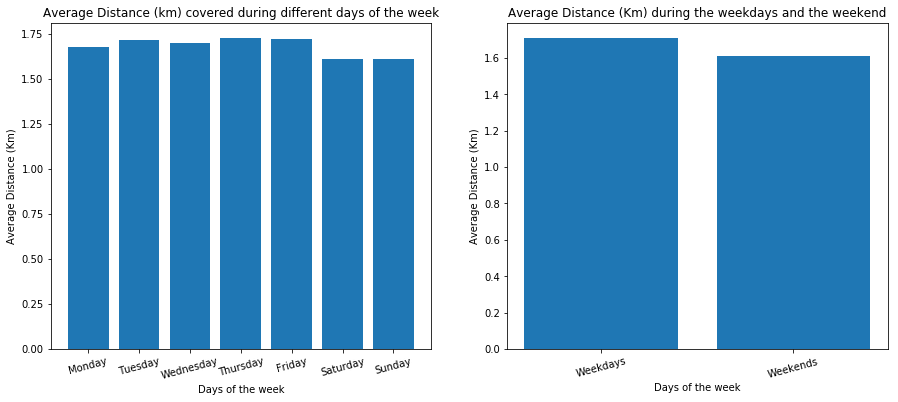

In [72]:
# Distance (Km) travelled during different days of the week and during weekdays and weekends
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ],[monday, tuesday, wednesday, thursday, friday, saturday, sunday])
plt.title('Average Distance (km) covered during different days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Average Distance (Km)')
plt.xticks(rotation = 15);

plt.subplot(1,2,2)
plt.bar(['Weekdays', 'Weekends' ],[weekdays, weekends])
plt.title('Average Distance (Km) during the weekdays and the weekend')
plt.xlabel('Days of the week')
plt.ylabel('Average Distance (Km)')
plt.xticks(rotation = 15);

**Findings**:
*Average Distance (Km) covered in the Weekdays is higher than weekends*. 




**Conclusion**
- Average Distance (Km) covered in the Weekdays is higher than weekends. i.e.      **Distance : Weekdays >  Weekend**

- Average Duration (min) of the trip in Weekends is higher than weekdays. i.e.     **Time     : Weekdays < Weekend**

- Average Speed (Kmph) of the bikes during Weekdays is higher than weekends. i.e.  **Speed    : Weekdays > Weekend**

**Because of Higher Speed**:
- The bikes during the weekdays cover more distance in less time.

**One of the possible reasons**:
- People going to offices (weekdays) ride faster than the ones on weekend.
- Weekend bike rides must be for fun or leisure, since they cover less distance, and there is no reporting time.

moving on..

### Difference b/w the trip duration and distance of customer and subscriber.

In [73]:
df.groupby('user_type').duration_min.mean()

user_type
Customer      23.891262
Subscriber    10.669413
Name: duration_min, dtype: float64

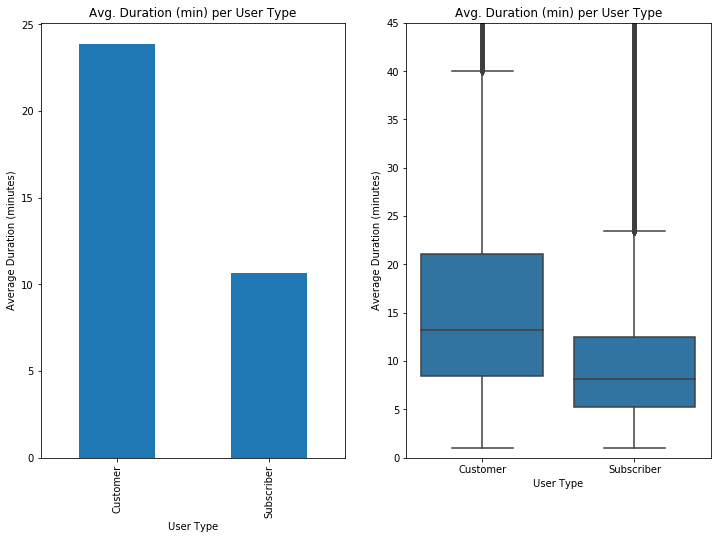

In [74]:
plt.figure(figsize=(12,8))

# average duration for each user type.
plt.subplot(1,2,1)
df.groupby('user_type').duration_min.mean().plot(kind='bar', color = base_color)
plt.title('Avg. Duration (min) per User Type')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('User Type');

# distribution of average duration for each user type.
plt.subplot(1,2,2)
sb.boxplot(data = df, y = 'duration_min', x = 'user_type', color = base_color)
plt.title('Avg. Duration (min) per User Type')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('User Type')
plt.ylim(0,45);


**Findings:**
- The Subscriber average duration is less than half of that of the unsubscribed people.
- Subscribed riders have shorter variance/difference of duration. They seem to have fixed path, with less variation.  

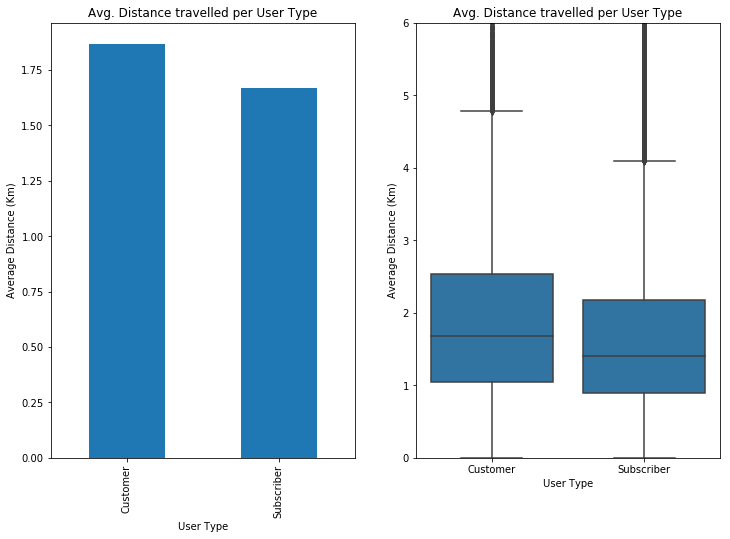

In [75]:
plt.figure(figsize=(12,8))

# average distance travelled by each user type.
plt.subplot(1,2,1)
df.groupby('user_type').distance_km.mean().plot(kind='bar', color = base_color)
plt.title('Avg. Distance travelled per User Type')
plt.ylabel('Average Distance (Km)')
plt.xlabel('User Type');

# distribution of average distance travelled by user type.
plt.subplot(1,2,2)
sb.boxplot(data = df, y = 'distance_km', x = 'user_type', color = base_color)
plt.title('Avg. Distance travelled per User Type')
plt.ylabel('Average Distance (Km)')
plt.xlabel('User Type');
plt.ylim(0,6);

**Findings**.
- Subscribers travel a little less on average. Not much though.
- Subscribers must be riding faster than the non subscribers, as they take less time and almost travel the same distance. 

**To prove subscribers travel faster**.

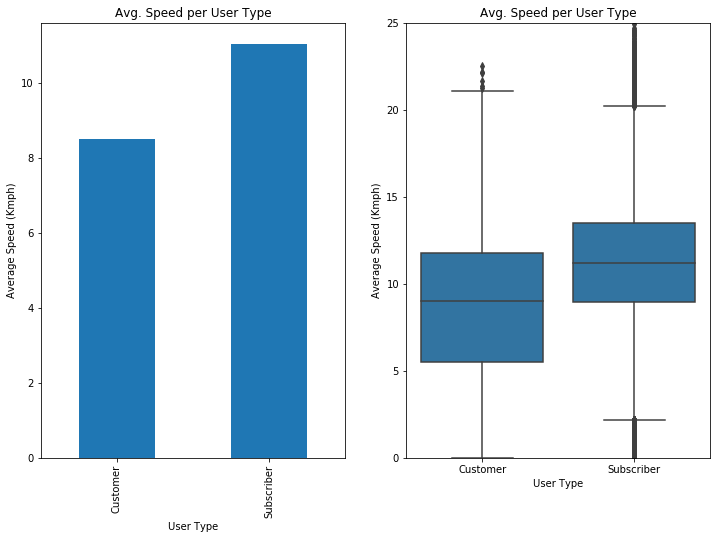

In [76]:
plt.figure(figsize=(12,8))
# average speed achieved by each user type.
plt.subplot(1,2,1)
df.groupby('user_type').speed_kmph.mean().plot(kind='bar', color = base_color)
plt.title('Avg. Speed per User Type')
plt.ylabel('Average Speed (Kmph)')
plt.xlabel('User Type');

# distribution of average speed achieved by each user type.
plt.subplot(1,2,2)
sb.boxplot(data = df, y = 'speed_kmph', x = 'user_type', color = base_color)
plt.title('Avg. Speed per User Type')
plt.ylabel('Average Speed (Kmph)')
plt.xlabel('User Type')
plt.ylim(0,25);

### As Predicted:
**Subscribers travels faster than Non Subscribers (Customers). Subscribers also have a more consistent speed range**.<br>
*(It seems subscribers are more experienced and take the same route everyday).*

### Relationship between avg. speed of the bike and Gender of the member

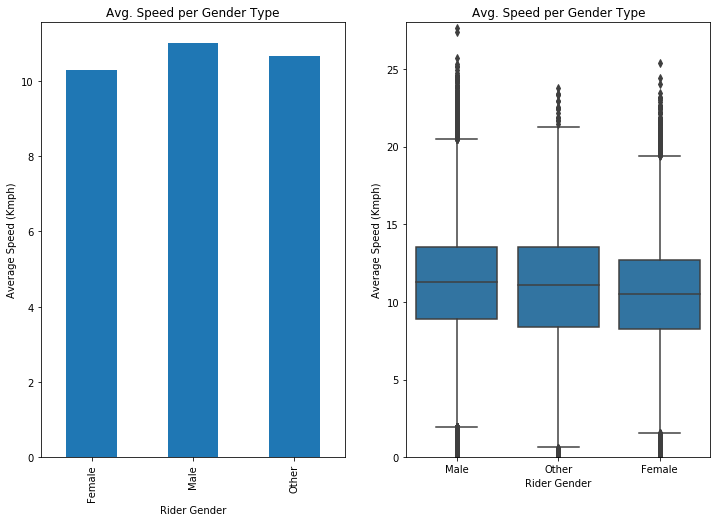

In [77]:
plt.figure(figsize = (12,8))

# average speed for each gender type.
plt.subplot(1,2,1)
df.groupby('member_gender').speed_kmph.mean().plot(kind = 'bar', color = base_color)
plt.title('Avg. Speed per Gender Type')
plt.ylabel('Average Speed (Kmph)')
plt.xlabel('Rider Gender');

# Distribution of average Speed for each gender type.
plt.subplot(1,2,2)
sb.boxplot(data = df, x= 'member_gender', y = 'speed_kmph', color = base_color)
plt.title('Avg. Speed per Gender Type')
plt.xlabel('Rider Gender')
plt.ylabel('Average Speed (Kmph)');
plt.ylim(0,28);

In [78]:
df.groupby('member_gender').speed_kmph.mean()

member_gender
Female    10.287139
Male      11.008522
Other     10.670995
Name: speed_kmph, dtype: float64

**Findings**:<br>
Not a significant amount, but Men are faster riders with a very small margin though.

### Relationship between avg. speed of the bike at different times of the day. 
Can help us in identifying Rush hours.

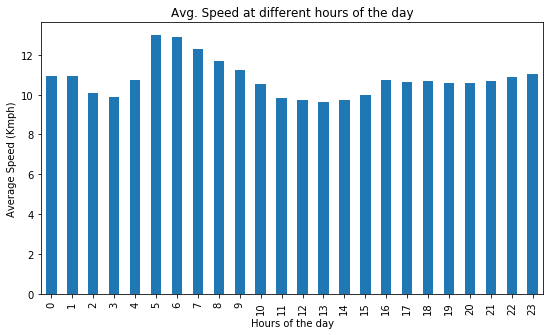

In [79]:
plt.figure(figsize = (9,5))

# average speed for at different times of a day.

df.groupby('start_hour').speed_kmph.mean().plot(kind = 'bar', color = base_color)
plt.title('Avg. Speed at different hours of the day')
plt.ylabel('Average Speed (Kmph)')
plt.xlabel('Hours of the day');


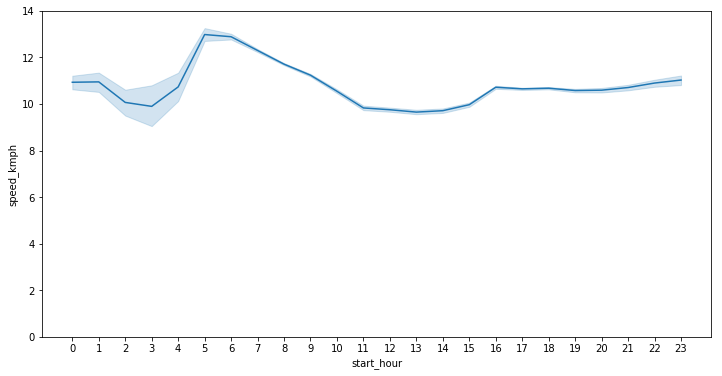

In [80]:
plt.figure(figsize=(12,6))
sb.lineplot(x = df['start_hour'], y =df['speed_kmph'])
plt.xticks(np.arange(0,24,1))
plt.ylim(0,14);

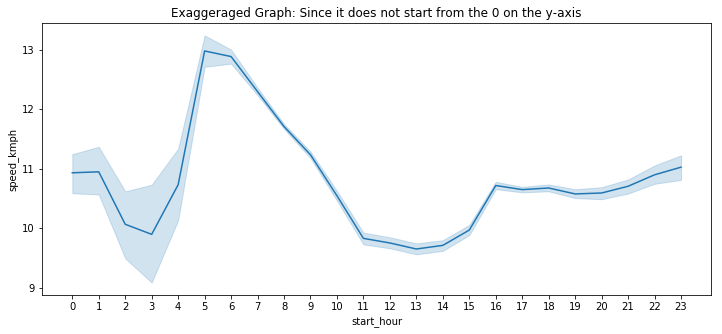

In [81]:
# Exaggirated for of the above graph, although it is not a correct graph since, it do not start from 0, at y axis.
plt.figure(figsize=(12,5))
sb.lineplot(x = df['start_hour'], y =df['speed_kmph'])
plt.xticks(np.arange(0,24,1))
plt.title('Exaggeraged Graph: Since it does not start from the 0 on the y-axis');

The above graph is **not correct**. It is just to **exaggerate** the difference.
**Findings**: <br>
- Maximum speed is between Morning *4am - 9am*. Reaches the peak and 6 am and traffic start increasing and speed gets down.
- It hit the lowest point at the afternoon time *12pm - 3pm*.
- After 4pm it is almost constant,with slight increase, till midnight.

**It's common knowledge that if the bike speed is high we will take less time to travel, i.e. less duration. Let's see if it's happening with the help of the graph.**

- *Less Speed*  >> **More Duration of the trip**
- *More Speed*  >> **Less Duration of the trip**

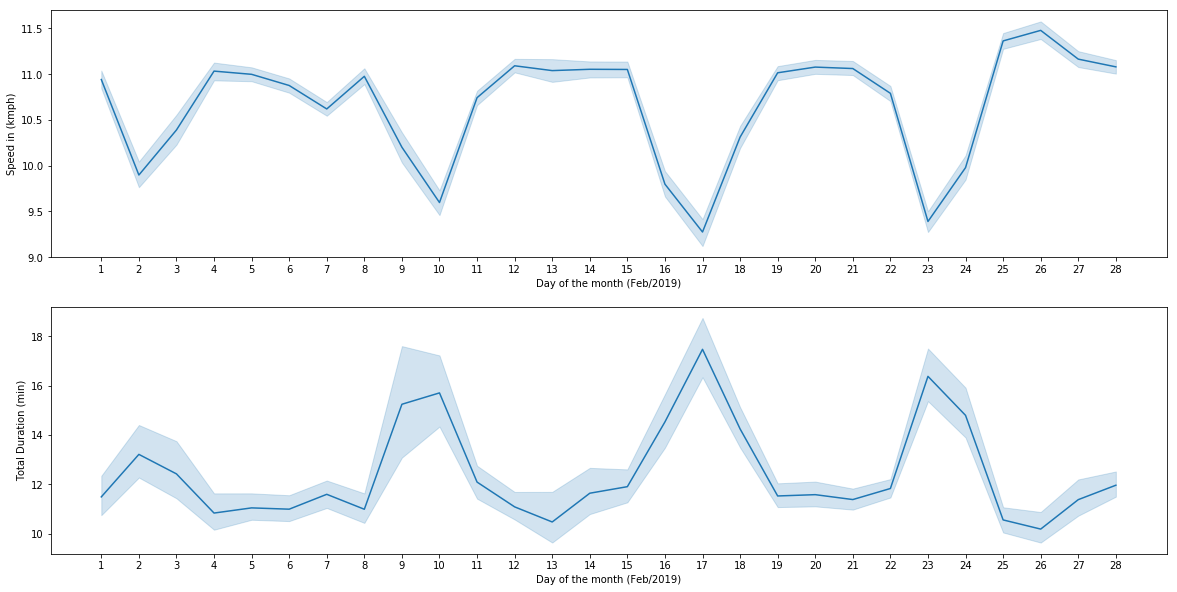

In [82]:
# plotting the speed vs duration and distance vs duration to see if the pattern is visible.
plt.figure(figsize = [20,10])
plt.subplot(2,1,1)
sb.lineplot(x = df['dom'], y =df['speed_kmph'])
plt.xlabel('Day of the month (Feb/2019)')
plt.ylabel('Speed in (kmph)')
plt.xticks(days)

plt.subplot(2,1,2)
sb.lineplot(x = df['dom'], y =df['duration_min'])
plt.xlabel('Day of the month (Feb/2019)')
plt.ylabel('Total Duration (min)')
plt.xticks(days)
plt.show();

**The above graph shows very clear patterns, during the month of february :**
- When the time duration is more the speed is less.
- When speed is more the time duration is less.<br>
The above graph is so good to look at, it is like looking at the mirror image. And it was not a surprice, since, time and speed are inversely proportional. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
After comparing different features with each other we have come up with the following list of relationship or dependence. 
- **Weekdays Vs Weekends**
    - Average Duration (min) of the trip in Weekends is higher than weekdays.
    - Average Speed (Kmph) of the bikes during Weekdays is higher than weekends
    - Average Distance (Km) covered in the Weekdays is higher than weekends.

>> Distance travelled (Km) : Weekdays > Weekend<br>
   Time of a trip (min)    : Weekdays < Weekend<br>
   Average Speed (Kmph)    : Weekdays > Weekend
  
Based on above insights, I think because of **Higher Speed** on weedays:

The bikes during the weekdays cover more distance in less time. As, people going to offices (weekdays) ride faster than the ones on weekends. Weekend bike rides could be for fun or leisure, since they cover less distance, takes more time as there is no reporting time. But we need more data to confirm the claim, it is just a hypothesis, at this point.

- **Subscribers Vs Non-Subscribers (customers)**.
    - The Subscriber average duration is less than half of that of the unsubscribed people.
    - Subscribed riders have shorter variance/difference of duration. They seem to have fixed time/path, with less variation. 

    - **Subscribers travels faster than Non Subscribers (Customers)**. 
    - **Subscribers also have a more consistent speed range**.
    - It seems subscribers are more experienced and take the same route everyday (don't have enough data to back that).
    
<br>
- **Average Bike speed at different times of the day**. 
    - Maximum speed is between Morning *4am - 9am*. Reaches the peak at 6 am and traffic start increasing and speed gets down.
    - It hit the lowest point at the afternoon time *12pm - 3pm*.
    - After 4pm it is almost constant,with slight increase, till midnight.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**Gender and Speed**<br>
Not a significant amount, but Males are the fastest gender, with a very small margin though, second is others and third is female gender. The margins are very little. Not significant.
<br>
**Age Vs Speed**<br>
Almost non existant correlation, although with age, a small decline in speed, can be noticed.

<a id='me'></a>
## Multivariate Exploration

We will create plots of three or more variables to investigate our data even further. I will also see how user type, different day of the month, day of the week affect the changes in speed, distance or time of the trip. 

**Since we have more than 180k datapoints, the multivariate plot is getting dirty and the results are not clearly visible and --**
- To reduce the clutter and increase visibility.
- And to reduce processing time. <br>
We are taking 5000 random rows in a new dataframe(dfs).

In [83]:
# dfs is short for dataframe sample.
np.random.seed(2019)
sample = np.random.choice(df.shape[0], 5000, replace = False)
dfs = df.loc[sample]

The next Graph shows, average time taken (in minutes) at different *time of the day* for *Subscribers* and *Non-Subscribers*-
<br>1 -- Full dataset  (**df**)
<br>2 -- Sample dataset  (**dfs**)
<br>
We want to see if, the subscribers and customer take different time to complete the trip (duration), at different time of the day.

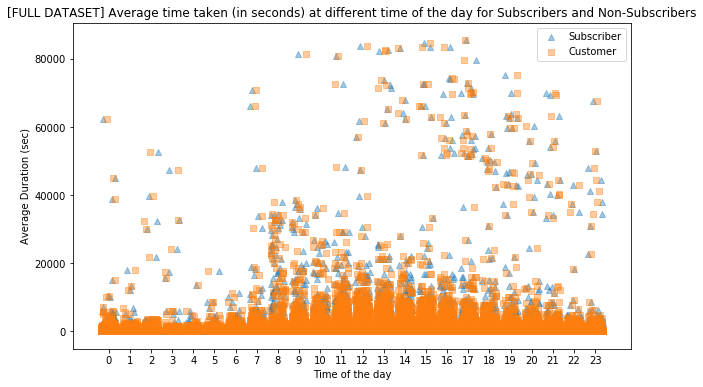

In [84]:
## FULL DATASET
# plot showing average time taken (in seconds) at different time of the day for Subscribers and Non-Subscribers.
plt.figure(figsize = [10,6])
usert_markers = [['Customer', '^'],
                ['Subscriber', 's']]

for usert, marker in usert_markers:
    plot_data = df.loc[df['user_type'] == usert]
    sb.regplot(data = df, x ='start_hour', y='duration_sec', x_jitter = 0.35, scatter_kws = {'alpha': 0.4},
               fit_reg = False, marker = marker);
plt.title('[FULL DATASET] Average time taken (in seconds) at different time of the day for Subscribers and Non-Subscribers')
plt.xlabel('Time of the day')
plt.ylabel('Average Duration (sec)')
plt.legend(['Subscriber', 'Customer'])
plt.xticks(np.arange(0,24,1));

**Still no significant difference noticed Let's make two seperate plots to notice any kind of difference**.  <br>
x axis : *start_hour*<br>
y axis : *duration_sec*<br>
1st plot : Subscriber
<br>2nd Plot: Customer.

<Figure size 864x432 with 0 Axes>

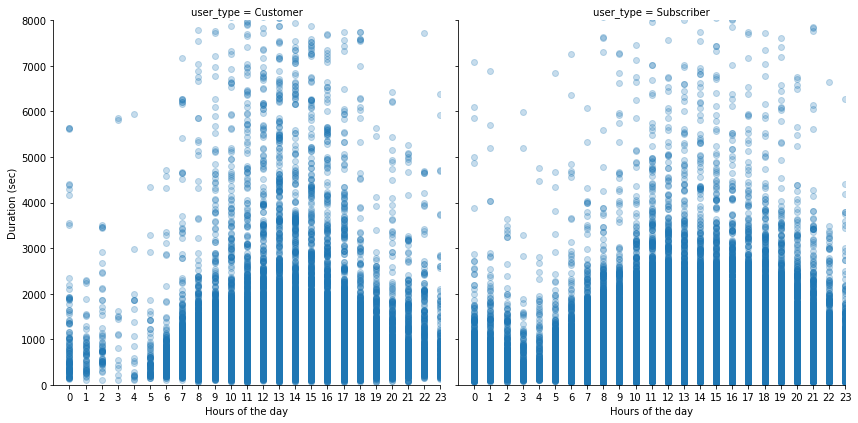

In [85]:
# Plotting three graph with Age (x axis), Duration_sec (y-axis) and the make three depending on the gender type.
plt.figure(figsize=(12,6))
usert = sb.FacetGrid(data = df, col = 'user_type', size = 6, xlim = [-1,23], ylim = [0, 8000])
usert.map(plt.scatter, 'start_hour', 'duration_sec', alpha=0.25, color = sb.color_palette()[0])
usert.set_xlabels('Hours of the day')
usert.set_ylabels('Duration (sec)')
plt.xticks(np.arange(0,24,1))
plt.show();

Still can't tell any significant/noticible difference. Need to use different graphs.

<br>**Plotting the same graph for speed instead of duration.. Let's see what we find**.

<Figure size 1008x432 with 0 Axes>

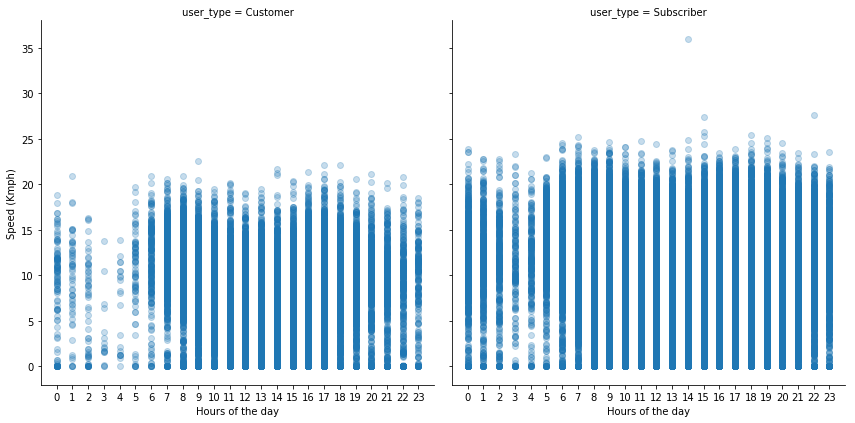

In [86]:
# Plotting three graph with Age (x axis), Duration_sec (y-axis) and the make three depending on the gender type.
plt.figure(figsize=(14,6))
genders = sb.FacetGrid(data = df, col = 'user_type', size = 6, xlim = [-1,24])
genders.map(plt.scatter, 'start_hour', 'speed_kmph', alpha=0.25, color = sb.color_palette()[0])
genders.set_xlabels('Hours of the day')
genders.set_ylabels('Speed (Kmph)')
plt.xticks(np.arange(0,24,1))
plt.show();

In [87]:
df.groupby(['user_type']).speed_kmph.mean()

user_type
Customer       8.506632
Subscriber    11.050547
Name: speed_kmph, dtype: float64

**We can very clearly see, Subscribers are faster than Customers**.<br>
Average Customer speed : 8.5 Kmph<br>
Average Subscriber Speed : 11.05 Kmph<br>

**Let's see if the same is true with user type of different age groups**.<br>



<Figure size 1008x432 with 0 Axes>

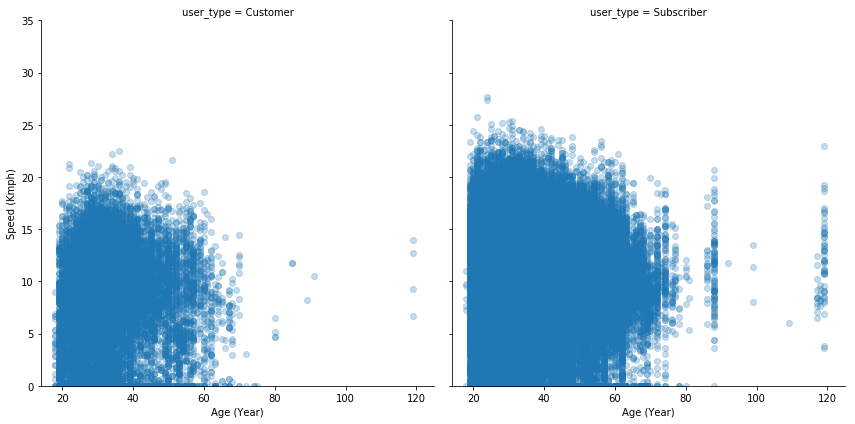

In [88]:
# Plotting two graph with Age (x axis), Speed (y-axis) for customers and subscribers
plt.figure(figsize=(14,6))
genders = sb.FacetGrid(data = df, col = 'user_type', size = 6, xlim = [14, 125], ylim = [0, 35])
genders.map(plt.scatter, 'age', 'speed_kmph', alpha=0.25, color = sb.color_palette()[0])
genders.set_xlabels('Age (Year)')
genders.set_ylabels('Speed (Kmph)')
plt.show();

We need to do some calculation to see, if the older people are more inclined to be subscribers. We know by sheer numbers, we have way more subscribers than we have customers. In a proportional manner, let's see if people are subscribing more as they grow older. 

In [89]:
# Firstly, We will find the number of :
# customer and subscribers under the age 60.
cus_less60, sub_less60 = df.query('age<  60').groupby('user_type').age.count()
# Customer and subscribers 60 or over
cus_over60 , sub_over60 = df.query('age>= 60 & age <= 120').groupby('user_type').age.count()

# Under 60
#proportion of subscriber to customer
proportion = sub_less60/cus_less60
print(proportion)

9.471980380134887


In [90]:
# we saw for every 10 customer under 60, there are 94 subscribers.
# If the same trend continues, number of subscribers over 60  will be
estimate_sub_over60 = proportion * cus_over60
print(estimate_sub_over60)

2415.3549969343962


In [91]:
# Actual number of subscribers over 60
print(sub_over60)

3898


In [92]:
# We have way more subscribers.. Let's see by what proportion we have more subscriber over 60
inc_prop = 100* (sub_over60 - abs(estimate_sub_over60))/abs(estimate_sub_over60)
print(inc_prop)

61.3841445645629


**Findings**<br>
- Trend continues, Subscribers are faster we can clearly see the hight difference(speed on the y-axis), in both the distributions.
- Older people (60 +) are more inclined to be a subscriber of the service. 
- 61 % more subscriber than it should be over the age of 60.
<br>
<br>

Let's see if how speed changes depending on the gender now. <br>
**Plotting the graph of speed (kmph) with age (year) for different gender groups**.

<Figure size 1008x432 with 0 Axes>

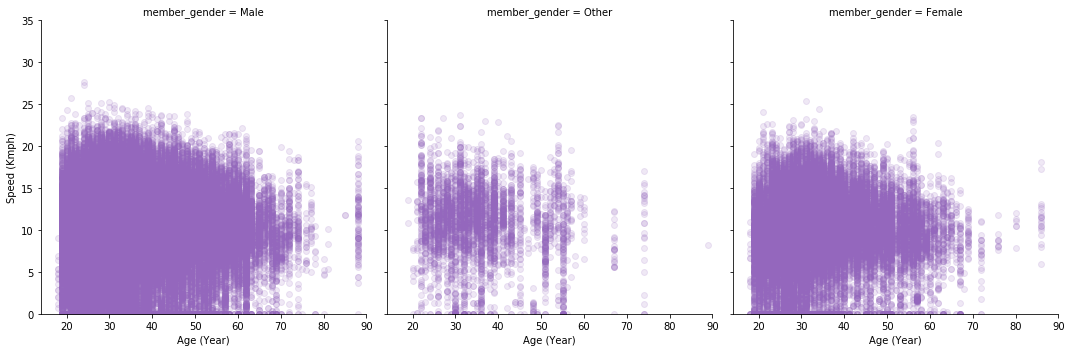

In [93]:
# Plotting the same with speed here
plt.figure(figsize=(14,6))
genders = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, size = 5, xlim = [14, 90], ylim = [0, 35])
genders.map(plt.scatter, 'age', 'speed_kmph', alpha=0.15, color = sb.color_palette()[4])
genders.set_xlabels('Age (Year)')
genders.set_ylabels('Speed (Kmph)')
plt.show();

**Findings** <br>
- In both male and female we can see the trends that the speed declines with age, this trend is not observed with the other gender type.
- Males are slightly faster than both the groups.
- Can't comment on older age as the datapoints are not distributed equally, Males are 3 quarter of the entire dataset. <br>
<br>
<br>
**Is there a patter on different days of the week, different types of user (Subscribers or Customer) travel. Let's explore**. 

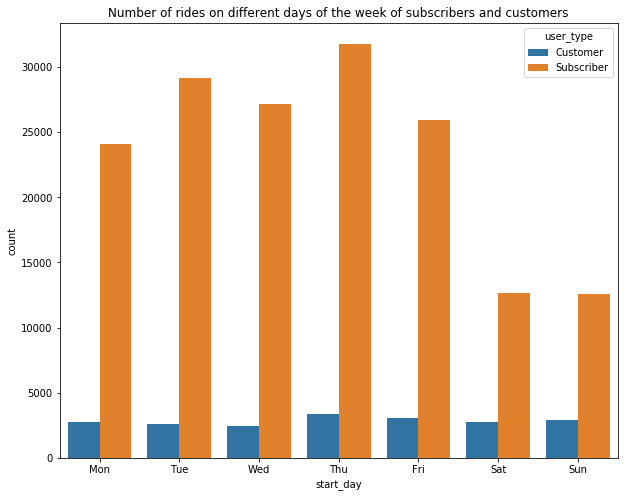

In [94]:
plt.figure(figsize=(10,8))

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df, x = 'start_day', hue = 'user_type', order = day_order);
plt.title('Number of rides on different days of the week of subscribers and customers');

**Findings**   (*Very exciting results*)<br>
- The number of trips by subscribers decreased by a factor of half in weekends compared to weekdays, but for customers there is no difference.
- Thursday is the most popular day both for subscribers and customers to head out for a trip.

After these exciting findings, let's see if the time of travel (period) also changes during the week. Special attention is on the changes in weekends. 

- **Morning**     - (6 am to 12pm)
- **Afternoon**   - (12 pm to 4pm)
- **Evening**     - (4 pm to 8 pm)
- **Night**       - Rest of the time

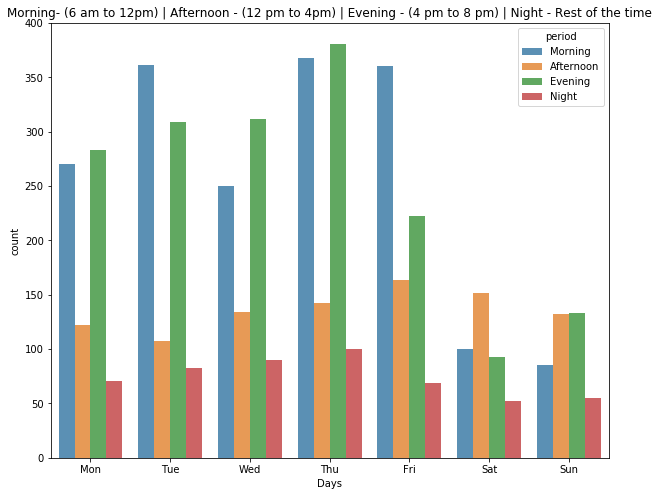

In [95]:
# Plotting a graph with number of trips on y axis, day of the week on the x axis and on each day 
plt.figure(figsize=(10,8))
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = dfs, x = 'start_day', hue = 'period', alpha = 0.8, order = day_order);
plt.xlabel('Days')
plt.title('Morning- (6 am to 12pm) | Afternoon - (12 pm to 4pm) | Evening - (4 pm to 8 pm) | Night - Rest of the time');

**Findings**:<br>
- During the weekdays, most number of trips are during Morning and Evening.
- During the weekends, most number of trips happen during the afternoon and evening. 
- The number of trips in the afternoon were not affected by weekdays or weekends.
- Number of trips during night (8pm to 6am) remain least popular, through the entire week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Subscribers are faster than Customers, (Average Customer speed) : 8.5 Kmph, while (Average Subscriber Speed) : 11.05 Kmph


- In both male and female we can see the trends that the speed declines with age. Males are slightly faster than both the groups.

- Older people (60 +) are more inclined to be a subscriber of the service (61% more subscriber than it should be over the age of 60).

- The number of trips by subscribers decreased by approximately a factor of half in weekends compared to weekdays, but for customers there is almost no difference. Thursday is the most popular day for both subscribers and customers to head out for a trip.

- During the weekdays, most number of trips are during Morning and Evening. During the weekends, most number of trips happen during the afternoon and evening.
### Were there any interesting or surprising interactions between features?

The number of trips in the afternoon were not affected by weekdays or weekends. Number of trips during night (8pm to 6am) remain least popular, through the entire week. Don't know why but on thrusday the number of trip are the most. On 13th of Feb. (Wed) there is unusally low number of trips recorded. Rest is up there. Thank you for reading all this. This is the end of our Data Exploration journey. 